<a href="https://colab.research.google.com/github/Poojakjain25/CVIP_DATA_SCIENCE/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys
import librosa
import librosa.display
import seaborn as sbs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings
from IPython.display import Audio


In [96]:
if not sys.warnoptions:
  warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [97]:
data = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data"
data_directory_list = os.listdir(data)

file_emotion = []
file_path = []

for directory in data_directory_list:
    if os.path.isdir(os.path.join(data, directory)):
        actor = os.listdir(os.path.join(data, directory))
        for file in actor:
            part = file.split(".")[0]
            part = part.split('-')
            if len(part) >= 3:
                file_emotion.append(int(part[2]))
                file_path.append(os.path.join(data, directory, file))

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
data_df = pd.concat([emotion_df, path_df], axis=1)
print(data_df)


      Emotions                                               Path
0            1  /content/drive/MyDrive/speech-emotion-recognit...
1            7  /content/drive/MyDrive/speech-emotion-recognit...
2            5  /content/drive/MyDrive/speech-emotion-recognit...
3            3  /content/drive/MyDrive/speech-emotion-recognit...
4            2  /content/drive/MyDrive/speech-emotion-recognit...
...        ...                                                ...
1434         7  /content/drive/MyDrive/speech-emotion-recognit...
1435         7  /content/drive/MyDrive/speech-emotion-recognit...
1436         6  /content/drive/MyDrive/speech-emotion-recognit...
1437         8  /content/drive/MyDrive/speech-emotion-recognit...
1438         8  /content/drive/MyDrive/speech-emotion-recognit...

[1439 rows x 2 columns]


In [98]:
data_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy',4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace = True)
data_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/speech-emotion-recognit...
1,disgust,/content/drive/MyDrive/speech-emotion-recognit...
2,angry,/content/drive/MyDrive/speech-emotion-recognit...
3,happy,/content/drive/MyDrive/speech-emotion-recognit...
4,calm,/content/drive/MyDrive/speech-emotion-recognit...


In [99]:
datapath = pd.concat([data_df], axis = 0)
datapath.to_csv("data_path.csv", index = False)
datapath.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/speech-emotion-recognit...
1,disgust,/content/drive/MyDrive/speech-emotion-recognit...
2,angry,/content/drive/MyDrive/speech-emotion-recognit...
3,happy,/content/drive/MyDrive/speech-emotion-recognit...
4,calm,/content/drive/MyDrive/speech-emotion-recognit...


In [100]:
data_df['Emotions'].value_counts()

disgust     192
angry       192
happy       192
calm        192
surprise    192
sad         192
fear        192
neutral      95
Name: Emotions, dtype: int64

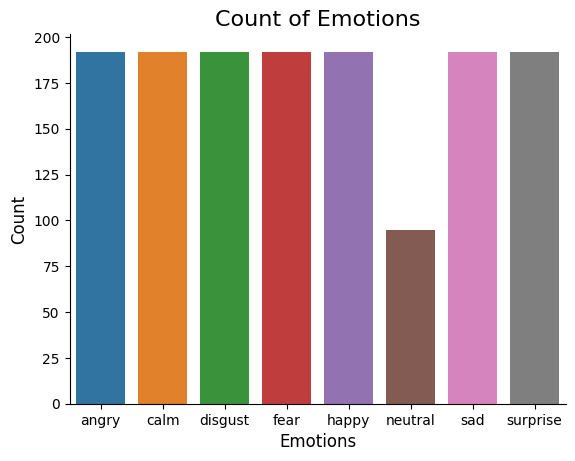

In [101]:
datapath['Emotions'] = pd.Categorical(datapath['Emotions'])
plt.title('Count of Emotions', size=16)
sbs.countplot(data=datapath, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sbs.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [102]:
def Createwaveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('WavePlot for Audio with {} emotion'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


In [103]:
import librosa
import matplotlib.pyplot as plt

def Createspectrogram(data, sr, e):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


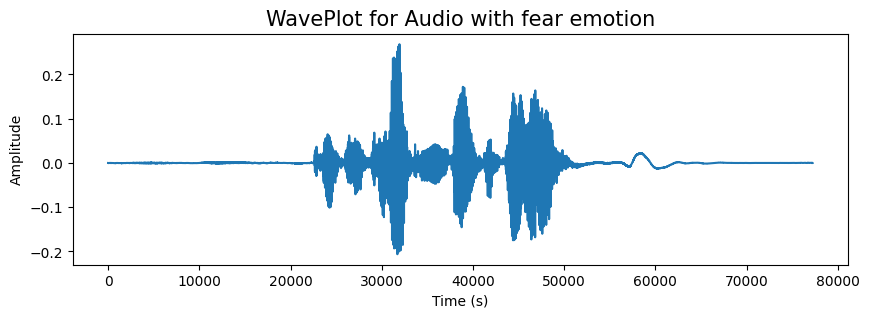

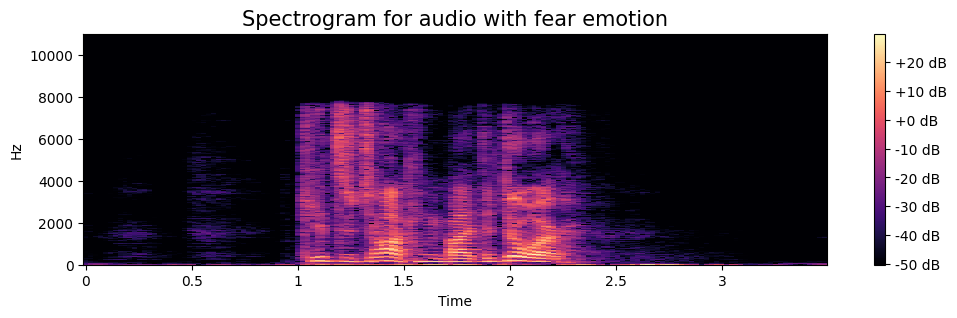

In [104]:
emotion = 'fear'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

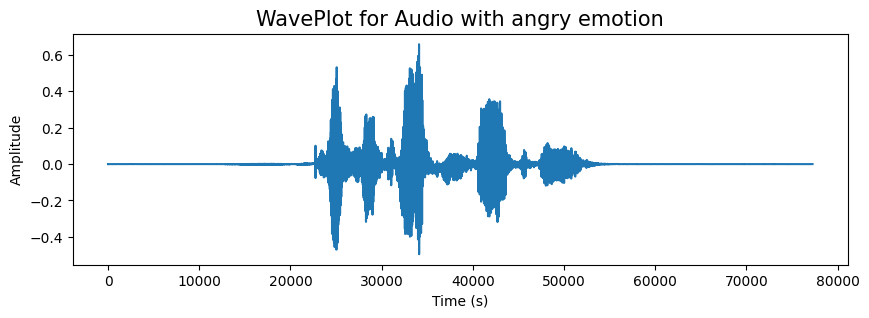

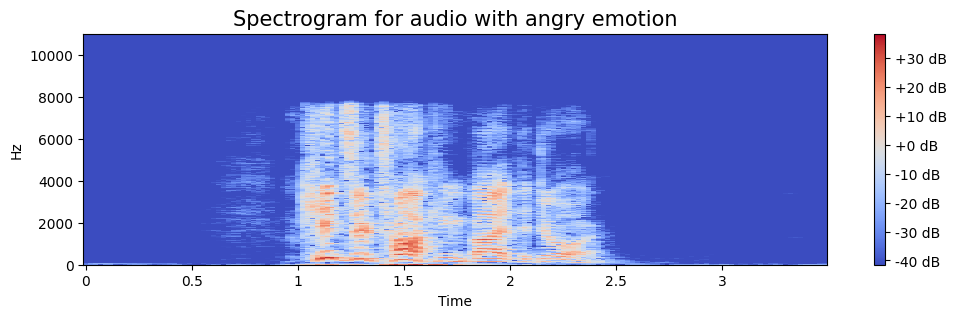

In [105]:
emotion = 'angry'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

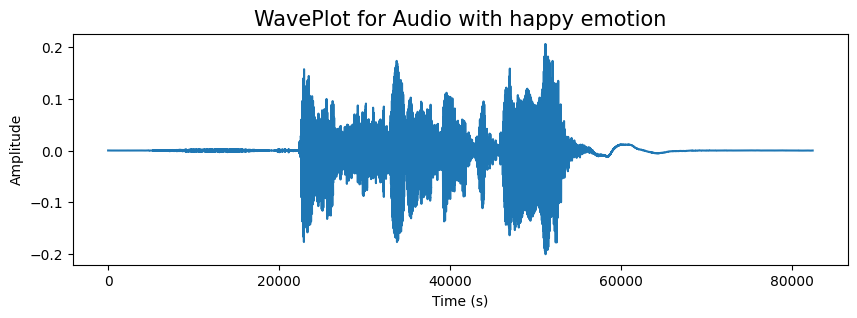

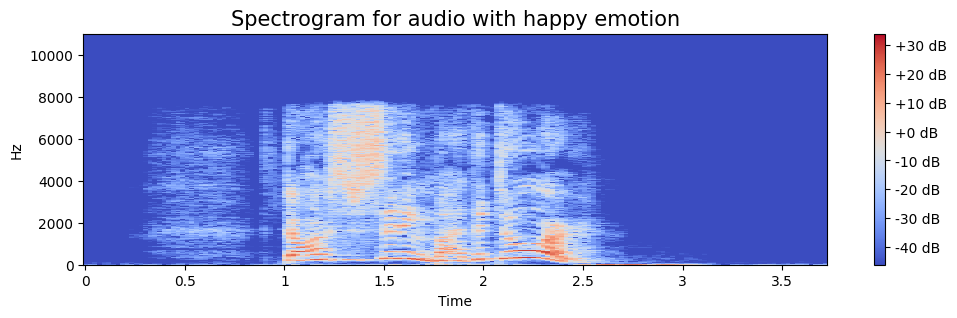

In [106]:
emotion = 'happy'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

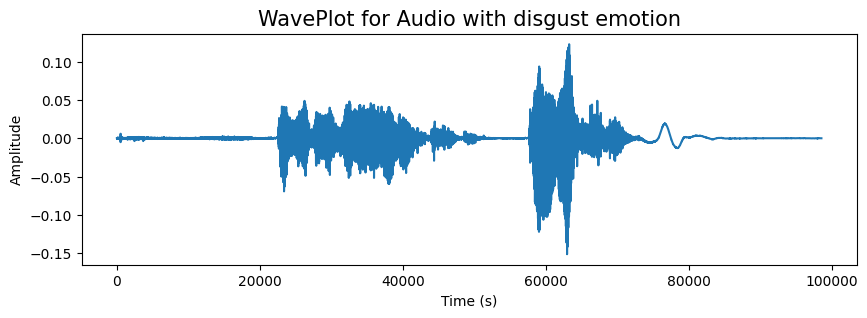

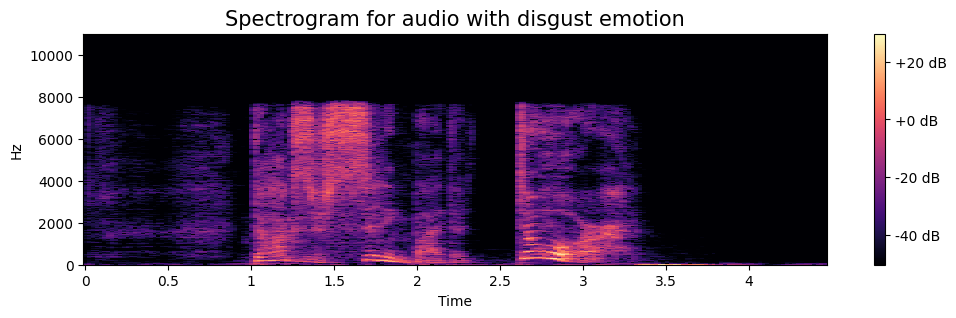

In [107]:
emotion = 'disgust'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

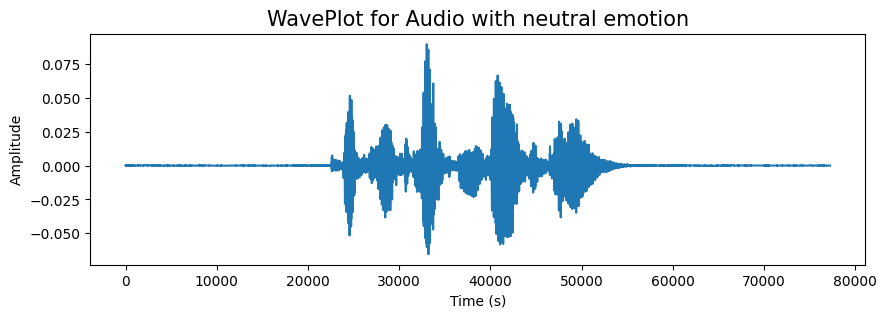

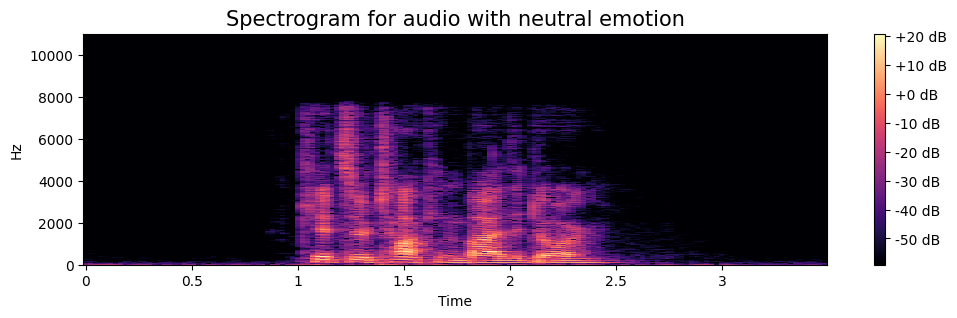

In [108]:
emotion = 'neutral'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

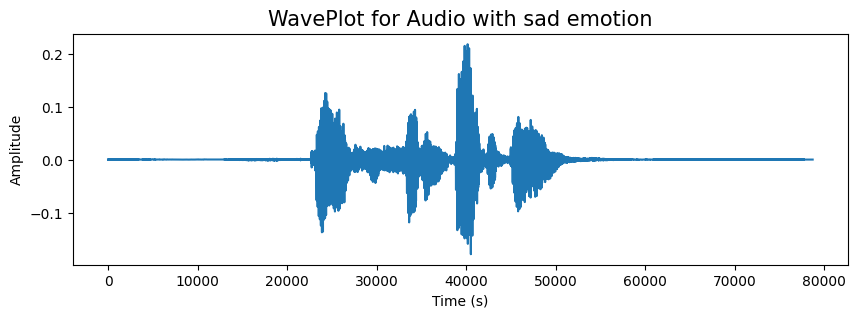

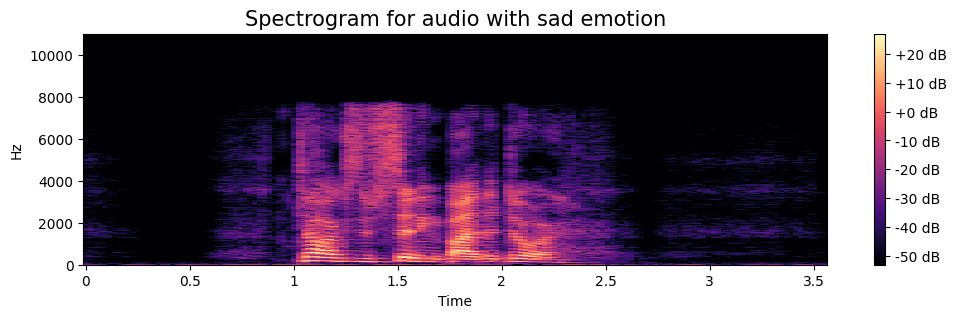

In [109]:
emotion = 'sad'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

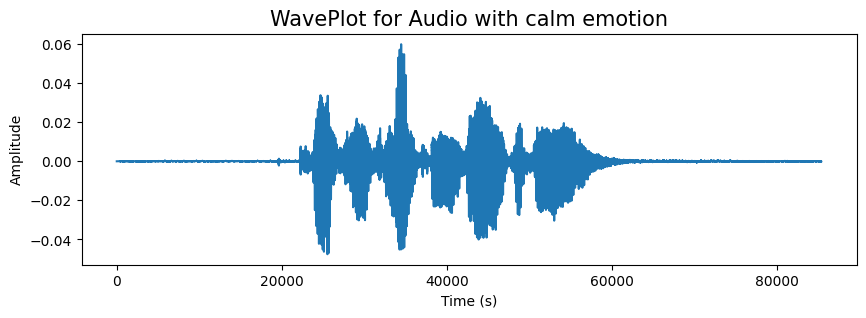

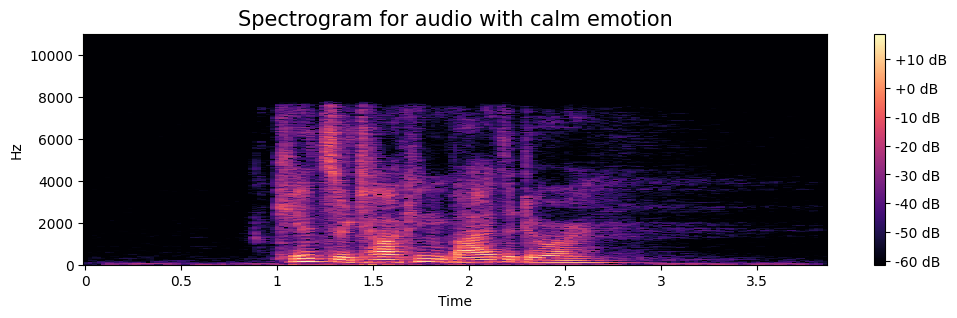

In [110]:
emotion = 'calm'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

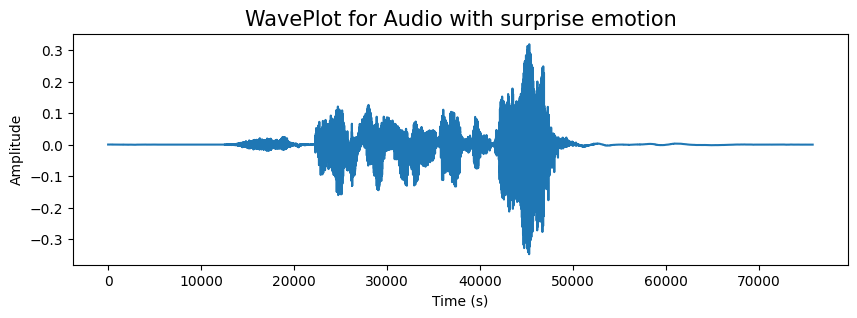

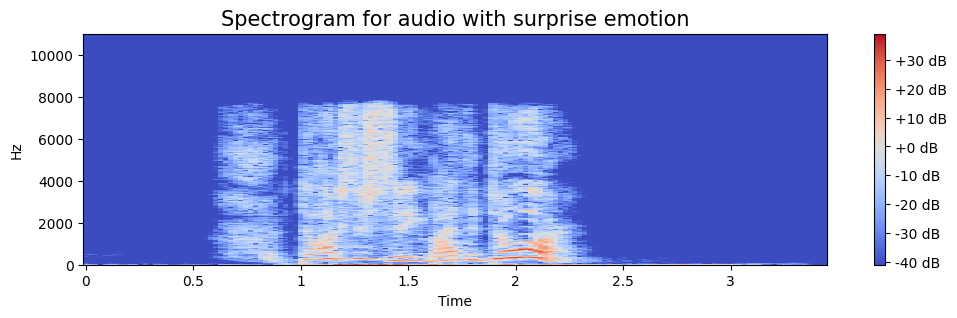

In [111]:
emotion = 'surprise'
path = np.array(datapath.Path[datapath.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
Createwaveplot(data, sampling_rate, emotion)
Createspectrogram(data, sampling_rate, emotion)
Audio(path)

In [112]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [113]:
extract_mfcc(data_df['Path'][0])

array([-6.1122351e+02,  8.8992615e+01, -3.4375558e+00,  2.9122580e+01,
        3.2328830e+00,  1.1017292e+01,  6.3312354e+00, -2.0071571e+00,
       -1.0062273e+01,  6.1616611e+00, -2.3709888e+00, -2.1579485e+00,
        7.3998508e+00, -2.7618623e+00,  1.1170007e+00, -1.0484555e+00,
        8.3891279e-01, -4.8199930e+00,  6.4596033e-01,  7.8176945e-01,
       -1.7830933e+00, -1.8675520e-01, -1.2560205e+00, -7.8253105e-02,
       -2.0246661e+00,  3.0665272e-01, -2.0852222e+00, -7.0747584e-02,
       -3.1856270e+00, -6.1409175e-01,  1.3425963e-01, -1.4023981e+00,
        1.4498212e+00, -1.3034528e+00, -9.6991944e-01, -2.5729179e+00,
       -1.2854687e+00, -2.3894408e+00, -1.1905246e+00, -1.8501664e+00],
      dtype=float32)

In [114]:
X_mfcc = []

for audio_data in data_df['Path']:
    mfcc = extract_mfcc(audio_data)
    X_mfcc.append(mfcc)

In [115]:
X_mfcc

[array([-6.1122351e+02,  8.8992615e+01, -3.4375558e+00,  2.9122580e+01,
         3.2328830e+00,  1.1017292e+01,  6.3312354e+00, -2.0071571e+00,
        -1.0062273e+01,  6.1616611e+00, -2.3709888e+00, -2.1579485e+00,
         7.3998508e+00, -2.7618623e+00,  1.1170007e+00, -1.0484555e+00,
         8.3891279e-01, -4.8199930e+00,  6.4596033e-01,  7.8176945e-01,
        -1.7830933e+00, -1.8675520e-01, -1.2560205e+00, -7.8253105e-02,
        -2.0246661e+00,  3.0665272e-01, -2.0852222e+00, -7.0747584e-02,
        -3.1856270e+00, -6.1409175e-01,  1.3425963e-01, -1.4023981e+00,
         1.4498212e+00, -1.3034528e+00, -9.6991944e-01, -2.5729179e+00,
        -1.2854687e+00, -2.3894408e+00, -1.1905246e+00, -1.8501664e+00],
       dtype=float32),
 array([-4.9728430e+02,  7.7070869e+01, -1.0112672e+01,  2.4764006e+01,
        -7.3236275e+00,  1.3885680e+01, -1.6050095e+01, -5.9436738e-02,
        -1.0774703e+01,  4.0937858e+00, -7.3798065e+00, -7.0555568e+00,
         5.9317040e+00, -9.2369270e+00, 

In [116]:
X_mfcc = pd.DataFrame(X_mfcc)
X_mfcc.shape

(1439, 40)

In [117]:
X = np.expand_dims(X, -1)
X.shape

(1439, 40, 1, 1)

In [118]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data_df[['Emotions']])

In [119]:
y.shape

(1439, 8)

In [120]:
y = y.toarray()

In [121]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                

In [122]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)